## Import libaray

In [1]:
import requests, json
from bs4 import BeautifulSoup
import datetime
import re
import jieba.analyse
import glob, os
import time
from PIL import Image

## Download data from Appledaily News

In [2]:
SearchString = "離岸風電"

StartDate_Str = '20180101'

EndDate_Str = '20181225'

StartDate = datetime.datetime.strptime(StartDate_Str,'%Y%m%d')
EndDate = datetime.datetime.strptime(EndDate_Str,'%Y%m%d')

SearchPage = 0

# Define desired replacements for non-chinese words
rep = {
        "GW": "兆瓦", 
        "MW": "萬千瓦", 
        "0": "零",
        "1": "一",
        "2": "二",
        "3": "三",
        "4": "四",
        "5": "五",
        "6": "六",
        "7": "七",
        "8": "八",
        "8": "九" 
      }


while (True):
    
    time.sleep(3)

    SearchPage = SearchPage+1
    url = (
           "https://tw.appledaily.com/search/ajaxresult?querystrS={}".format(SearchString) + 
           "&sort=time" +
           "&searchType=all" +
           "&dateStart={}%2F{}%2F{}".format(StartDate.year, StartDate.month, StartDate.day) +
           "&dateEnd=2018%2F12%2F22".format(EndDate.year, EndDate.month, EndDate.day) + 
           "&page={}".format(SearchPage)
          )

    webdata = requests.get(url).text

    reqsjson = json.loads(webdata)


    for content in reqsjson:
        article_title = content['title']
        article_publish_date = content['pubDate']
        article_data = requests.get(content['sharing']['url']).text

        article_data_suop = BeautifulSoup(article_data, 'html.parser')

        article_text = article_data_suop.find('div',class_='ndArticle_margin').p.get_text()


        # use these three lines to do the replacement
        rep = dict((re.escape(k), v) for k, v in rep.items())
        pattern = re.compile("|".join(rep.keys()))
        article_text = pattern.sub(lambda m: rep[re.escape(m.group(0))], article_text)


        article_text = re.sub(r'[^\u4e00-\u9fa5]', " ",article_text) 
        cn_pattern = re.compile(r'[\u4e00-\u9fa5,\u0020]')
        article_cn_text = "".join(cn_pattern.findall(article_text))

    #     en_pattern = re.compile(r'[\u0061-\u007a,\u0020]')
    #     article_en_text = "".join(unen.findall(my_text2.lower()))
    
        if not os.path.exists(SearchString):
            os.makedirs(SearchString)
            
        SaveTitle = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。?、~@#￥%……&*（）]+", "",article_title)
        
        try:
            with open("{0}\{1}_{2}.txt".format(SearchString,article_publish_date,SaveTitle), "w", encoding = 'utf8') as text_file:
                text_file.write(article_cn_text)
        except:
            continue

        print ("{0}_{1}".format(article_publish_date,article_title))

        
    num_article_publish_date = datetime.datetime.strptime(article_publish_date,'%Y%m%d')
    
    if num_article_publish_date < StartDate or webdata == "[]":
        break
        
    print ('done page{}'.format(SearchPage))
    
print ('done all')  

20181217_藍營立委卡再生能源基金　衰到太陽能業者
20181215_綠能爆財務困境　牽連太陽能個股全走跌
20181213_台加經貿對話　聚焦投保協定與離岸風電
20181213_離岸風電融資管道　明年起新增兩大項
20181212_台加投保協議　明天可望討論
20181212_加拿大首度表態 擬與我談投保協議
20181211_【華為公主被捕】時機敏感　加國外長：考慮跟台灣簽投保議
20181211_採購風電價格每度要5.8元　藍委呼籲鄭文燦不要圖利廠商
20181211_高銘志：離岸風電爭議，漁業署的確強渡關山
20181211_十二月十一日各報頭條搶先看
20181210_製造業Q3固定資產增購年增24.3%
20181210_回應監察院離岸風電檢討報告　經濟部：幫全民省4千億
20181209_鋼鐵上游穩中下游苦　明年看美國臉色
20181208_打空污牌勝選，更該推動再生能源扎根中台灣
20181205_十二月五日財經焦點搶先看
20181205_離岸風電太陽能廠 嗆撤資 政府補助大砍超過1成
20181204_【撂狠話】離岸風電補助遭砍逾1成　4外商大廠「將撤資」
20181204_發展綠能需龐大資金　專家：銀行可借機發展專案融資
20181204_離岸風電4大外商嗆撤資　經濟部：調整不能隨口說說
20181203_躉購電價大調降　太陽能業者跳腳明開記者會回應
done page1
20181201_媒體追問吳音寧去向　蔡英文：我現在不是黨主席了
20181201_GDP今明年都下修 主計總處估本季經濟成長勉強保2
20181130_關注離岸風電　丹麥外交部司長級官員首度來台
20181130_終結連3季上修！主計處下調今年GDP成長預測至2.66%
20181130_開發商齊跳腳！離岸風電躉購費率明年大降12.71%
20181130_十一月三十日各報頭條搶先看
20181129_搭台商回流順風車，政府可以先做這些事
20181129_地震測報太慢被譙怕　氣象局要花12.7億靠這招翻身
20181129_明年離岸風電躉購費率擬調降　外商可能「不玩了」
20181129_「新經濟移民法」拍板！　開放外國中階技術人力補缺口
20181128_「非核家園政策沒有轉彎」　原能會主委：盼核二核三如期除役
20181127_行政院：能源政策非髮夾彎　公投是

In [3]:
# os.chdir(".")
words_list = []
os.chdir("離岸風電")
for file in glob.glob("*.txt"):
    
    with open( file, "rb") as f:
        for line in f:
            tags = jieba.analyse.extract_tags(line, topK=10, withWeight=True)
            for tag, weight in tags:
                words_list.append(tag)
                
print ('done')
                

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\BENLIN~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.813 seconds.
Prefix dict has been built succesfully.


done


In [4]:
from collections import Counter

counts = Counter(words_list)
print(counts)

Counter({'離岸': 124, '台灣': 99, '風電': 64, '彰化': 32, '能源': 31, '風場': 27, '報導': 27, '發展': 27, '經濟部': 25, '零零': 25, '產業': 24, '遴選': 24, '投資': 22, '風力': 21, '發電': 21, '經濟': 19, '沈榮津': 17, '千瓦': 17, '基礎': 17, '轉型': 16, '二零二': 16, '推動': 16, '沃旭': 16, '兆瓦': 15, '風機': 15, '綠能': 15, '太陽能': 15, '開發': 14, '電廠': 14, '中鋼': 13, '價格': 13, '非核': 12, '二零一': 12, '階段': 11, '市場': 11, '容量': 11, '立委': 11, '電力': 11, '上緯': 10, '台電': 10, '影響': 10, '我們': 10, '英文': 10, '再生能源': 10, '規劃': 9, '相關': 9, '台船': 9, '未來': 9, '競價': 9, '廠商': 9, '公投': 9, '企業': 9, '技術': 8, '環境': 8, '審查': 8, '億元': 8, '水下': 8, '國民黨': 8, '業者': 8, '成長': 8, '環評': 7, '穩定': 7, '問題': 7, '民進': 7, '江俞庭': 7, '目標': 7, '家園': 7, '政府': 7, '每度': 7, '天然': 7, '完工': 6, '國際': 6, '合約': 6, '行政院': 6, '深澳': 6, '地化': 6, '競標': 6, '結果': 6, '海事': 6, '總統': 6, '選舉': 6, '缺電': 6, '台中港': 5, '專案': 5, '供電': 5, '進行': 5, '預計': 5, '透過': 5, '建置': 5, '世紀': 5, '集團': 5, '西門子': 5, '歌美颯': 5, '電價': 5, '計畫': 5, '賴清德': 5, '作業': 5, '興達': 5, '機會': 5, '九元': 5, '簽署': 5, '調降': 5, '一零': 4, '外商':

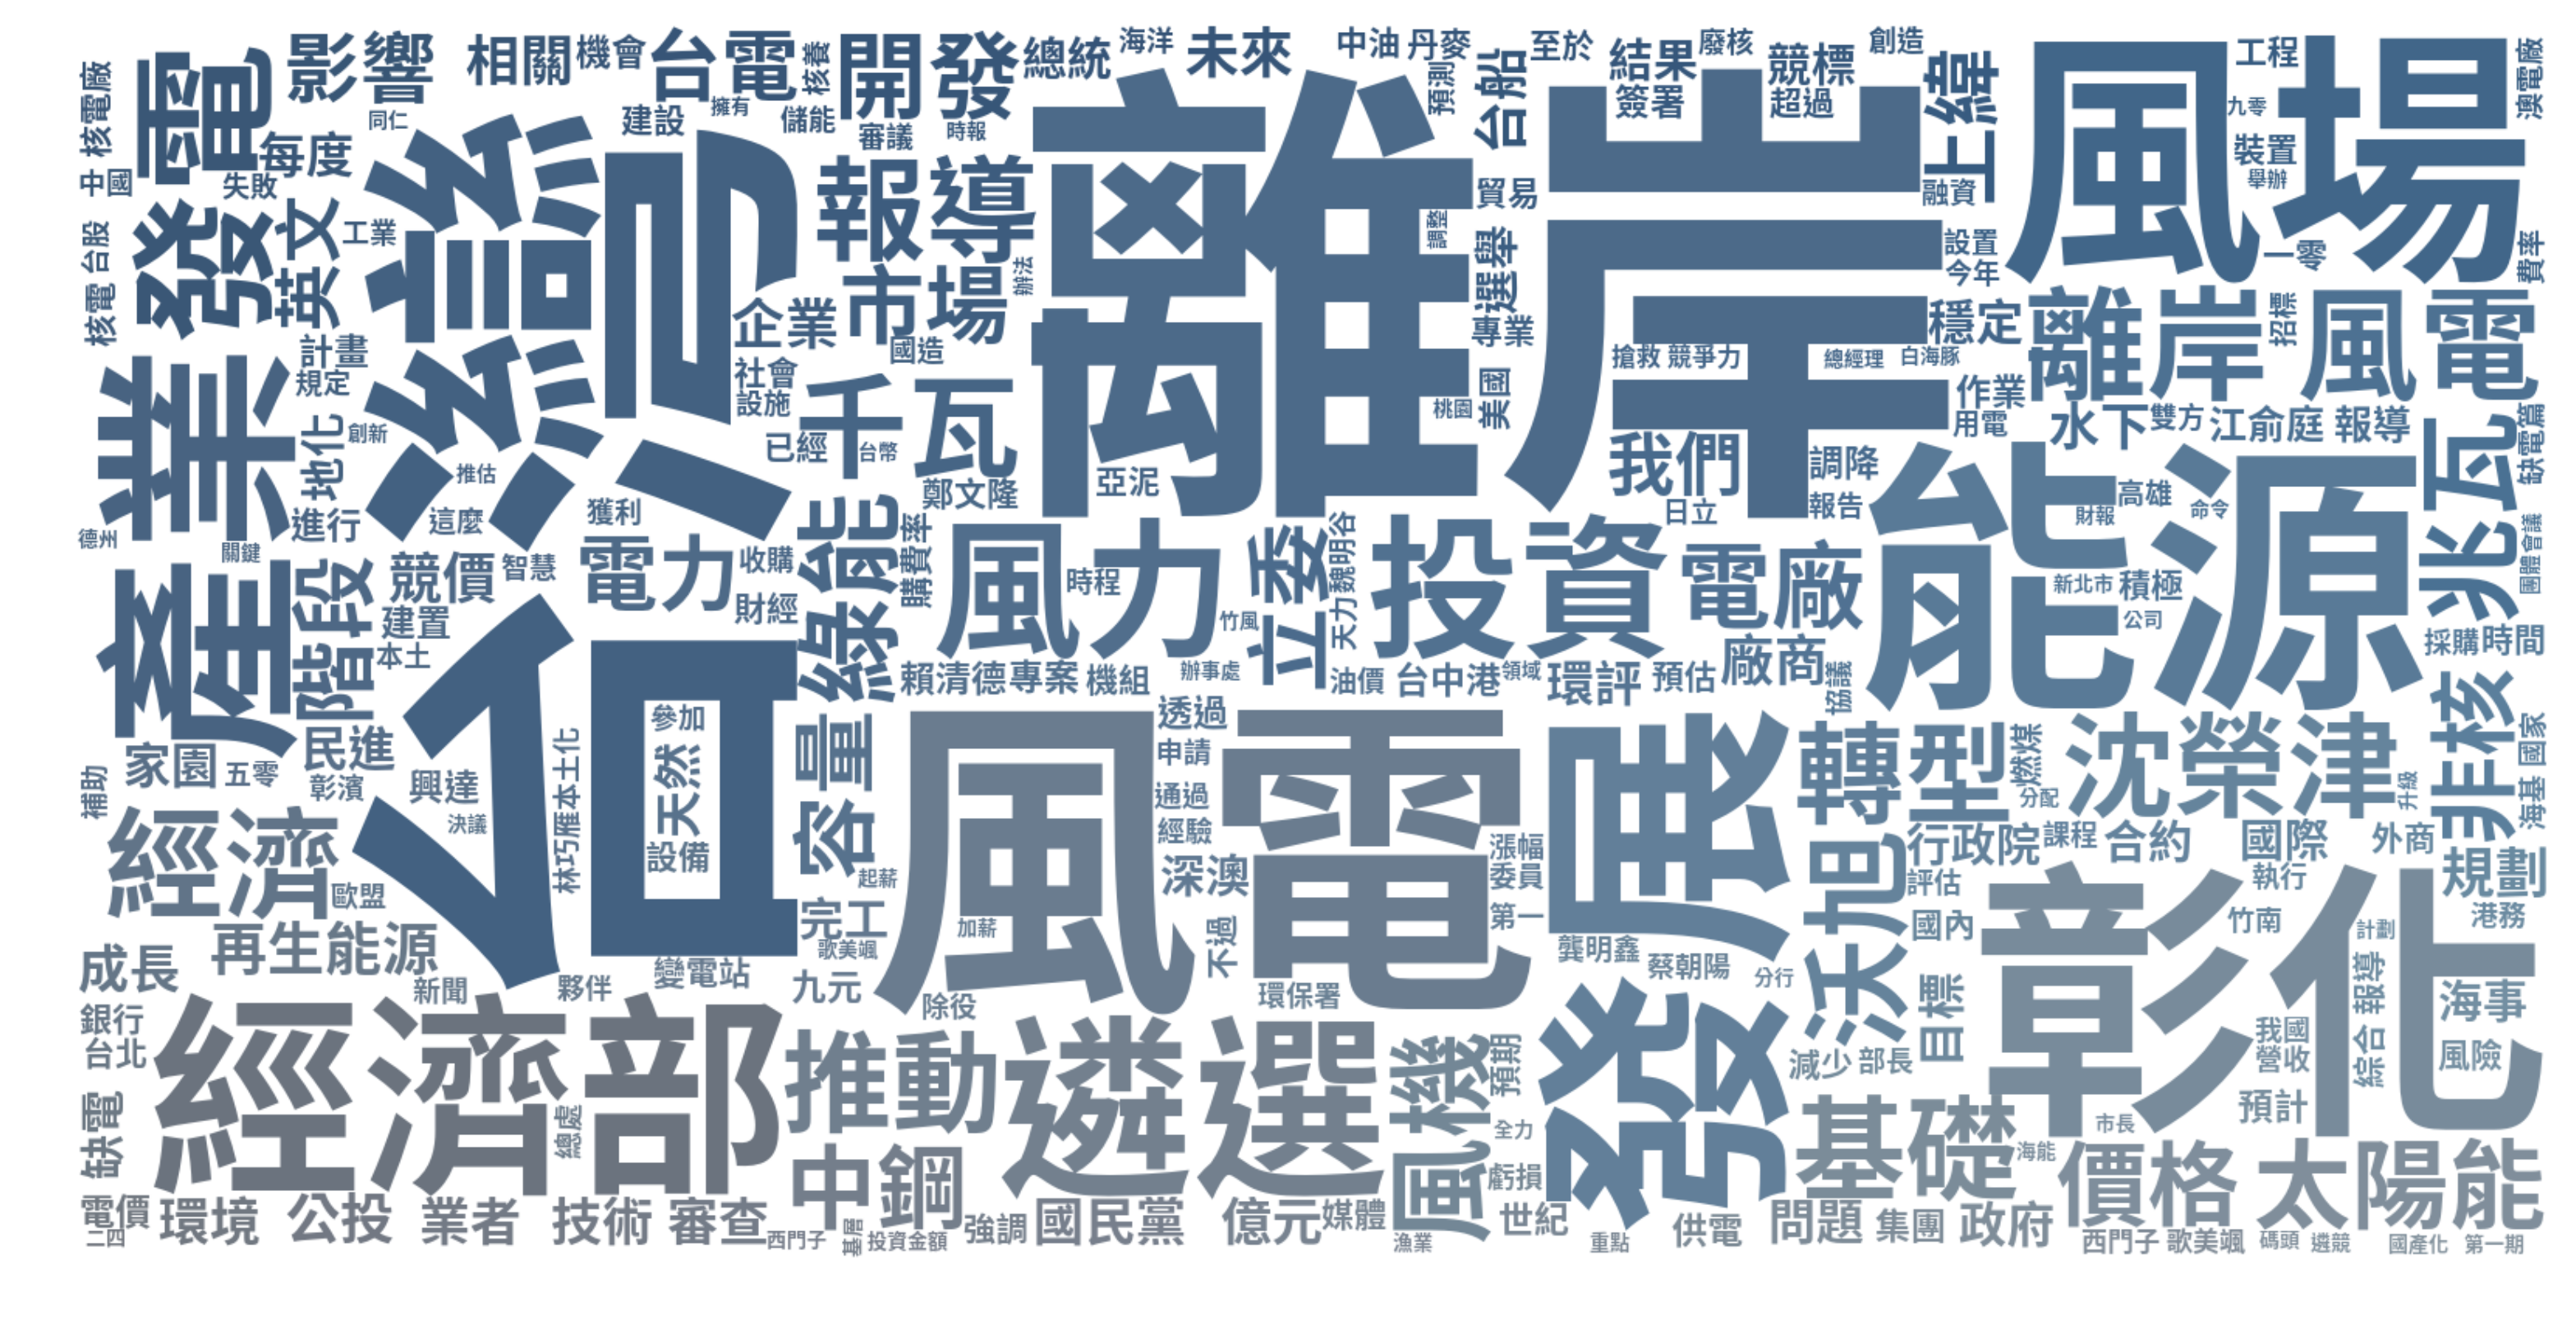

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

my_color_fig = np.array(Image.open("aaa.jpg"))
image_colors = ImageColorGenerator(my_color_fig)

text = ','.join(words_list)

# 設定停用字(排除常用詞、無法代表特殊意義的字詞)
stopwords = {}.fromkeys(["沒有","一個","什麼","那個","二零一","二零二","零零"])

# 產生文字雲
wc = WordCloud(font_path="NotoSansCJKtc-Bold.otf", #設置字體
               background_color="white", #背景顏色
               max_words = 250 ,        #文字雲顯示最大詞數
               width=1600,
               height=800,
               stopwords=stopwords)      #停用字詞

wc.generate(text)

# 視覺化呈現
plt.figure(figsize=(20,10), dpi = 200)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud.png', bbox_inches='tight', dpi = 200)
plt.show()
# wc.to_file("first_review.png")